In [1]:
import pandas as pd
import CococoNet_reader 
import pickle 
import tqdm
import Name_resolver
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
Name_resolver.species_name_resolver('Oryza sativa japonica')

'rice_jp'

In [3]:
species_with_nets = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/Species_name_resolver.csv')
species_with_nets = species_with_nets[:18]
# # species_with_nets = species_with_nets.drop(index = [13,14])
# # species_with_nets.loc[0,'Taxa ID'] = 39947 
taxa_to_keep = species_with_nets['Taxa ID'].to_list()
taxa_to_keep

[4530,
 39947,
 3750,
 4558,
 4577,
 29760,
 3711,
 3847,
 3880,
 4097,
 4113,
 4081,
 3702,
 3818,
 4565,
 3659,
 1753,
 15368]

In [4]:
species_with_nets_to_run = species_with_nets.loc[~species_with_nets['Common Name'].isin(['rice','wheat','rapeseed'])]
species_with_nets_to_run

,Species,Taxa ID,Common Name
1,Oryza sativa japonica,39947,rice_jp
2,Malus domestica,3750,apple
3,Sorghum bicolor,4558,sorghum
4,Zea mays,4577,maize
5,Vitis vinifera,29760,grape
6,Brassica rapa,3711,mustard
7,Glycine max,3847,soybean
8,Medicago truncatula,3880,medicago
9,Nicotiana tabacum,4097,tobacco
10,Solanum tuberosum,4113,potato


In [5]:
species_with_nets_to_run.to_csv('/data/passala/Generated_Tables/Reference_tables/species_for_running_cross_ortho_analysis.csv',index = False)

In [6]:
og_groups = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv')
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,100007at3193,4558_0:003a4f,4558,3193,4558_0:003a4f,LOC110434333
1,100007at3193,4577_0:004254,4577,3193,4577_0:004254,LOC100276500
2,100007at3193,4577_0:004e43,4577,3193,4577_0:004e43,LOC100275058
3,100067at3193,4558_0:00439a,4558,3193,4558_0:00439a,LOC8071983
4,100085at3193,4558_0:002fd8,4558,3193,4558_0:002fd8,LOC8086335
...,...,...,...,...,...,...
502887,9969at3193,15368_0:000e9a,15368,3193,15368_0:000e9a,LOC100834561
502888,99917at3193,39947_0:006297,39947,3193,39947_0:006297,LOC107276177
502889,99917at3193,39947_0:00634f,39947,3193,39947_0:00634f,LOC9269479
502890,99917at3193,39947_0:006629,39947,3193,39947_0:006629,LOC9269626


In [7]:
egad_scores = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Ortho_cross_all_tables/egad_scores_orthogroups.csv',index_col= 0)

In [8]:
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
10009at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.401113,0.346227,NaN,NaN,0.989036,0.001673,NaN,NaN,NaN,NaN
10051at3193,NaN,NaN,NaN,NaN,0.824484,0.097168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,NaN,NaN,0.972724,0.029325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN
10147at3193,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.966198,0.031113,0.573785,0.123953,NaN,NaN,NaN,NaN
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.745225,0.163335,0.914328,0.048738,0.952515,0.001031,NaN,NaN,NaN,NaN
9919at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.946469,0.037065,NaN,NaN,NaN,NaN
9942at3193,0.643618,0.192945,0.469626,0.436319,0.500000,0.500000,0.79142,0.082094,0.75488,0.002001,...,0.500000,0.500000,0.400784,0.345742,0.270053,0.178851,NaN,NaN,0.327220,0.14996


In [9]:
def get_fc_table(species_1,species_2):
    """Takes two species common names in any order and returns the N to M table for that pair with species_1 as column 1 and species_2 as column 2 

    Args:
        species_1 (str): species common name
        species_2 (str): species common name

    Returns:
        str: All N-M gene pairs
    """
    import pandas as pd
    import os 

    list_of_files = os.listdir('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/1_1_ortho_SC_tables')
    trimmed_to_species_1 = list(filter(lambda x:species_1 in x, list_of_files))
    final_file = list(filter(lambda x: species_2 in x, trimmed_to_species_1))[0]
    formatted_final_file = f"/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/1_1_ortho_SC_tables/{final_file}"
    read_in_file = pd.read_csv(formatted_final_file, index_col= 0)

    return read_in_file

In [10]:
current_table = get_fc_table('rice_jp','soybean')

In [11]:
current_table

,rice_jp and soybean,Species 1 Score,Species 2 Score,Total Score
0,10092at3193,compatability col,compatability col,0.889823
1,10147at3193,compatability col,compatability col,0.873666
2,10228at3193,compatability col,compatability col,0.871034
3,10238at3193,compatability col,compatability col,0.662195
4,10525at3193,compatability col,compatability col,0.656346
...,...,...,...,...
6834,9789at3193,compatability col,compatability col,0.713189
6835,9828at3193,compatability col,compatability col,0.934566
6836,9877at3193,compatability col,compatability col,0.955768
6837,9919at3193,compatability col,compatability col,0.969550


In [12]:
current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == 'grape']['Taxa ID'].item()

In [13]:
current_og_groups = og_groups.loc[og_groups['Species']==current_species_taxa]
current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]

In [14]:
current_og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
6,10009at3193,29760_0:005643,29760,3193,29760_0:005643,LOC104882588
7,10009at3193,29760_0:005709,29760,3193,29760_0:005709,LOC100267702
78,10092at3193,29760_0:001162,29760,3193,29760_0:001162,LOC100244127
123,10147at3193,29760_0:004e38,29760,3193,29760_0:004e38,LOC100266467
213,10228at3193,29760_0:005012,29760,3193,29760_0:005012,LOC100254135
...,...,...,...,...,...,...
502784,9919at3193,29760_0:002a0e,29760,3193,29760_0:002a0e,LOC100241131
502814,9942at3193,29760_0:000cf8,29760,3193,29760_0:000cf8,LOC100241864
502815,9942at3193,29760_0:00180e,29760,3193,29760_0:00180e,LOC100261021
502816,9942at3193,29760_0:006063,29760,3193,29760_0:006063,LOC100855403


In [15]:
current_table

,rice_jp and soybean,Species 1 Score,Species 2 Score,Total Score
0,10092at3193,compatability col,compatability col,0.889823
1,10147at3193,compatability col,compatability col,0.873666
2,10228at3193,compatability col,compatability col,0.871034
3,10238at3193,compatability col,compatability col,0.662195
4,10525at3193,compatability col,compatability col,0.656346
...,...,...,...,...
6834,9789at3193,compatability col,compatability col,0.713189
6835,9828at3193,compatability col,compatability col,0.934566
6836,9877at3193,compatability col,compatability col,0.955768
6837,9919at3193,compatability col,compatability col,0.969550


In [16]:
current_table.columns[0]

'rice_jp and soybean'

In [17]:
merged_groups = current_og_groups.merge(how = 'left', left_on = "Orthogroup",right_on=current_table.columns[0], right = current_table.iloc[:,[0,3]]  )

In [18]:
merged_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol,rice_jp and soybean,Total Score
0,10009at3193,29760_0:005643,29760,3193,29760_0:005643,LOC104882588,NaN,NaN
1,10009at3193,29760_0:005709,29760,3193,29760_0:005709,LOC100267702,NaN,NaN
2,10092at3193,29760_0:001162,29760,3193,29760_0:001162,LOC100244127,10092at3193,0.889823
3,10147at3193,29760_0:004e38,29760,3193,29760_0:004e38,LOC100266467,10147at3193,0.873666
4,10228at3193,29760_0:005012,29760,3193,29760_0:005012,LOC100254135,10228at3193,0.871034
...,...,...,...,...,...,...,...,...
22166,9919at3193,29760_0:002a0e,29760,3193,29760_0:002a0e,LOC100241131,9919at3193,0.969550
22167,9942at3193,29760_0:000cf8,29760,3193,29760_0:000cf8,LOC100241864,9942at3193,0.911171
22168,9942at3193,29760_0:00180e,29760,3193,29760_0:00180e,LOC100261021,9942at3193,0.911171
22169,9942at3193,29760_0:006063,29760,3193,29760_0:006063,LOC100855403,9942at3193,0.911171


In [19]:
merged_groups.groupby('Orthogroup').mean().dropna()

/tmp/ipykernel_314050/735756621.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_groups.groupby('Orthogroup').mean().dropna()


,Species,Ortholevel,Total Score
Orthogroup,,,
10092at3193,29760.0,3193.0,0.889823
10147at3193,29760.0,3193.0,0.873666
10228at3193,29760.0,3193.0,0.871034
10238at3193,29760.0,3193.0,0.662195
10525at3193,29760.0,3193.0,0.656346
...,...,...,...
9789at3193,29760.0,3193.0,0.713189
9828at3193,29760.0,3193.0,0.934566
9877at3193,29760.0,3193.0,0.955768


/tmp/ipykernel_314050/1654839291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])


<AxesSubplot:xlabel='Total Score', ylabel='Count'>

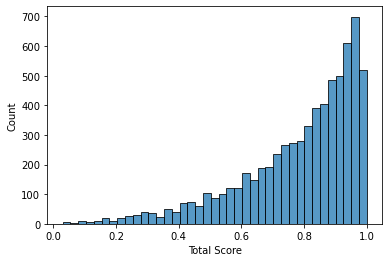

In [20]:
sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])

In [21]:
all_fc_scores = pd.DataFrame(index = egad_scores.index)
all_fc_scores

""
10009at3193
10051at3193
10092at3193
10147at3193
1018at3193
...
9842at3193
9877at3193
9919at3193
9942at3193


In [22]:
list_of_species_to_run_on = species_with_nets_to_run['Common Name'].to_list()


In [23]:
plant_combinations = list(itertools.permutations(list_of_species_to_run_on,2))

In [24]:
for species in list_of_species_to_run_on:
    print(species)
    combos_that_start_with_species = []


    for combo in plant_combinations:
        if combo[0] == species:
            combos_that_start_with_species.append(combo)



    species_specific_df = pd.DataFrame(index = egad_scores.index)
    outer_loop_species_taxa = Name_resolver.species_name_resolver(species,'taxa_id' )
    current_og_groups = og_groups.loc[og_groups['Species']==outer_loop_species_taxa]
    current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]
   
    



    for current_combination in combos_that_start_with_species:
        current_table =get_fc_table(current_combination[0],current_combination[1])
        current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == current_combination[0]]['Taxa ID'].item()
        merged_groups = current_og_groups.merge(how = 'left', left_on = "Orthogroup",right_on=current_table.columns[0], right = current_table.iloc[:,[0,3]] )
        mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
        species_specific_df = species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')
        species_specific_df = species_specific_df.rename(columns={'Total Score':current_combination[1]})

    mean_across_species = species_specific_df.mean(axis = 1)
    all_fc_scores[species] = mean_across_species



rice_jp


apple
sorghum
maize
grape
mustard
soybean
medicago
tobacco
potato
tomato
arabidopsis
peanut
cucumber
brome


In [25]:
current_table

,cucumber and brome,Species 1 Score,Species 2 Score,Total Score
0,10092at3193,compatability col,compatability col,0.773820
1,10147at3193,compatability col,compatability col,0.998483
2,10228at3193,compatability col,compatability col,0.950995
3,10238at3193,compatability col,compatability col,0.805741
4,10488at3193,compatability col,compatability col,0.974238
...,...,...,...,...
8234,9789at3193,compatability col,compatability col,0.851711
8235,9828at3193,compatability col,compatability col,0.919499
8236,9877at3193,compatability col,compatability col,0.955334
8237,9919at3193,compatability col,compatability col,0.983918


In [26]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
10009at3193,NaN,NaN,NaN,NaN,0.560921,NaN,0.606831,0.368294,0.539280,0.459016,0.484003,0.503888,0.625596,NaN,NaN
10051at3193,0.641810,NaN,0.513021,0.459234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,0.766775,0.515357,0.781117,0.815732,0.896560,0.628937,0.792847,0.711367,0.762168,0.774796,0.863167,0.724545,0.765329,0.754614,0.788682
10147at3193,0.852365,0.840704,0.927168,NaN,0.868427,0.962145,0.908282,0.847085,0.924003,0.930724,0.886209,0.795238,0.910722,0.930770,0.917276
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,0.949261,0.921867,0.927742,NaN,0.932810,0.934745,0.961888,0.900163,0.892143,0.905593,0.862097,0.893323,0.944350,0.877884,0.936478
9919at3193,0.981536,0.981206,0.982418,0.986521,0.980777,0.994177,0.965001,0.985783,0.950860,0.982277,0.981062,0.976321,0.956764,0.983771,0.977078
9942at3193,0.800873,0.674383,0.796709,0.786218,0.782984,0.881437,0.806781,0.870903,0.808063,0.884376,0.682480,0.870745,0.843252,0.884077,0.767198


In [27]:
egad_scores = egad_scores.replace(.5,np.nan)
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
10009at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.401113,0.346227,NaN,NaN,0.989036,0.001673,NaN,NaN,NaN,NaN
10051at3193,NaN,NaN,NaN,NaN,0.824484,0.097168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,NaN,NaN,0.972724,0.029325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10147at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.966198,0.031113,0.573785,0.123953,NaN,NaN,NaN,NaN
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.745225,0.163335,0.914328,0.048738,0.952515,0.001031,NaN,NaN,NaN,NaN
9919at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.946469,0.037065,NaN,NaN,NaN,NaN
9942at3193,0.643618,0.192945,0.469626,0.436319,NaN,NaN,0.79142,0.082094,0.75488,0.002001,...,NaN,NaN,0.400784,0.345742,0.270053,0.178851,NaN,NaN,0.327220,0.14996


In [28]:
egad_scores = egad_scores.filter(regex = 'AUC')

In [29]:
15-egad_scores.isna().sum(axis = 1)

10009at3193    4
10051at3193    1
10092at3193    2
10147at3193    5
1018at3193     0
              ..
9842at3193     0
9877at3193     7
9919at3193     2
9942at3193     9
9959at3193     2
Length: 15495, dtype: int64

In [30]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
10009at3193,NaN,NaN,NaN,NaN,0.560921,NaN,0.606831,0.368294,0.539280,0.459016,0.484003,0.503888,0.625596,NaN,NaN
10051at3193,0.641810,NaN,0.513021,0.459234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,0.766775,0.515357,0.781117,0.815732,0.896560,0.628937,0.792847,0.711367,0.762168,0.774796,0.863167,0.724545,0.765329,0.754614,0.788682
10147at3193,0.852365,0.840704,0.927168,NaN,0.868427,0.962145,0.908282,0.847085,0.924003,0.930724,0.886209,0.795238,0.910722,0.930770,0.917276
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,0.949261,0.921867,0.927742,NaN,0.932810,0.934745,0.961888,0.900163,0.892143,0.905593,0.862097,0.893323,0.944350,0.877884,0.936478
9919at3193,0.981536,0.981206,0.982418,0.986521,0.980777,0.994177,0.965001,0.985783,0.950860,0.982277,0.981062,0.976321,0.956764,0.983771,0.977078
9942at3193,0.800873,0.674383,0.796709,0.786218,0.782984,0.881437,0.806781,0.870903,0.808063,0.884376,0.682480,0.870745,0.843252,0.884077,0.767198


In [31]:
final_plotting_frame = pd.DataFrame(index = egad_scores.index)
final_plotting_frame['EGAD Species Present'] = 15-egad_scores.isna().sum(axis = 1)
final_plotting_frame['FC Species Present'] = 15 - all_fc_scores.isna().sum(axis =1)
final_plotting_frame['AVG FC'] = all_fc_scores.mean(axis =1)
final_plotting_frame['AVG EGAD'] = egad_scores.mean(axis = 1)
final_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,8,0.518479,0.829159
10051at3193,1,3,0.538021,0.824484
10092at3193,2,15,0.756133,0.910269
10147at3193,5,14,0.892937,0.709248
1018at3193,0,0,NaN,NaN
...,...,...,...,...
9842at3193,0,0,NaN,NaN
9877at3193,7,14,0.917167,0.852708
9919at3193,2,15,0.977703,0.913266
9942at3193,9,15,0.809365,0.543235


In [32]:
trimmed_plotting_frame = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>2) & (final_plotting_frame['FC Species Present']>2)]
trimmed_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,8,0.518479,0.829159
10147at3193,5,14,0.892937,0.709248
10228at3193,3,14,0.932771,0.601839
10525at3193,4,14,0.706894,0.637056
10648at3193,7,15,0.927171,0.534928
...,...,...,...,...
9609at3193,6,13,0.668755,0.838965
9789at3193,12,15,0.841694,0.764906
9828at3193,4,14,0.812374,0.913483
9877at3193,7,14,0.917167,0.852708


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

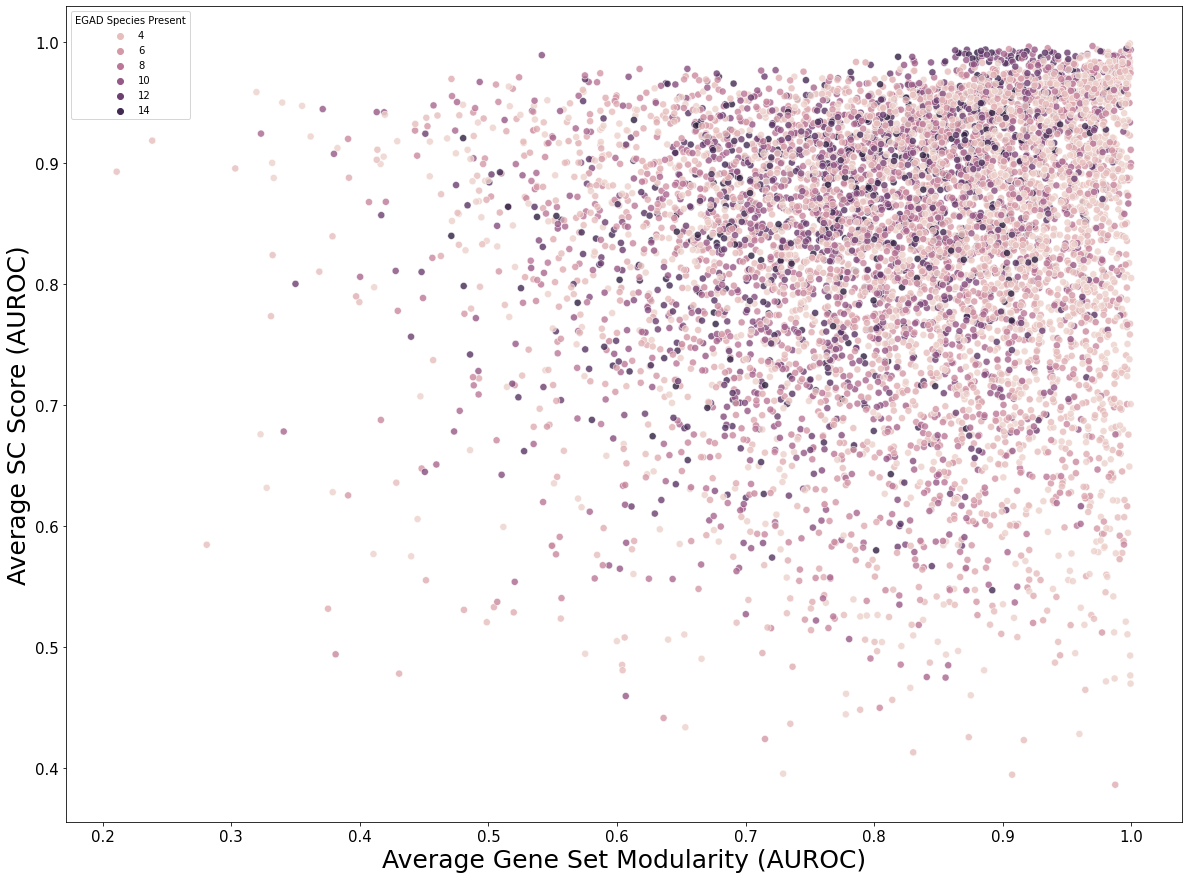

In [71]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'dimgray', alpha = .8, hue = 'EGAD Species Present')

plt.ylabel("Average SC Score (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [81]:
egad_scores.loc['121644at3193']

rice_jp AUC             NaN
apple AUC          0.289670
sorghum AUC        0.547261
maize AUC               NaN
grape AUC          0.645534
mustard AUC        0.599810
soybean AUC        0.604130
medicago AUC       0.558520
tobacco AUC        0.764482
potato AUC              NaN
tomato AUC         0.413626
arabidopsis AUC    0.304075
peanut AUC         0.603278
cucumber AUC            NaN
brome AUC          0.626659
Name: 121644at3193, dtype: float64

In [52]:
species_with_nets_to_run

,Species,Taxa ID,Common Name
1,Oryza sativa japonica,39947,rice_jp
2,Malus domestica,3750,apple
3,Sorghum bicolor,4558,sorghum
4,Zea mays,4577,maize
5,Vitis vinifera,29760,grape
6,Brassica rapa,3711,mustard
7,Glycine max,3847,soybean
8,Medicago truncatula,3880,medicago
9,Nicotiana tabacum,4097,tobacco
10,Solanum tuberosum,4113,potato


In [70]:
testing_group_1 = og_groups.loc[(og_groups['Orthogroup'] == '871799at3193') &(og_groups['Species'] == 4081)]
testing_group_1

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
388399,871799at3193,4081_0:001db3,4081,3193,4081_0:001db3,LOC101246329
388400,871799at3193,4081_0:00321d,4081,3193,4081_0:00321d,LOC101260240
388401,871799at3193,4081_0:005e31,4081,3193,4081_0:005e31,LOC101251957


In [84]:
testing_group_1 = og_groups.loc[(og_groups['Orthogroup'] == '121644at3193')]
testing_group_1['Species'].value_counts()

3818     4
3847     4
4097     4
3711     3
3750     3
15368    2
29760    2
3659     2
3702     2
3880     2
39947    2
4081     2
4113     2
4558     2
4577     2
Name: Species, dtype: int64

In [54]:
arab_coconet = CococoNet_reader.read_cococonet('arabidopsis')
arab_coconet

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310
AT1G01020,1.000000,0.676041,0.885107,0.916603,0.167027,0.625596,0.801175,0.866369,0.954286,0.715750,...,0.111731,0.193853,0.261697,0.299060,0.321617,0.287853,0.559907,0.017205,0.011806,0.091015
AT1G01030,0.676041,1.000000,0.707718,0.515532,0.420354,0.292083,0.687003,0.626281,0.483536,0.570675,...,0.245167,0.215414,0.255414,0.306986,0.308402,0.270118,0.463394,0.083490,0.059014,0.108780
AT1G01040,0.885107,0.707718,1.000000,0.836387,0.545101,0.701558,0.656258,0.857046,0.657204,0.650843,...,0.155183,0.230038,0.149740,0.334558,0.287951,0.186425,0.219380,0.032348,0.018332,0.057761
AT1G01050,0.916603,0.515532,0.836387,1.000000,0.562112,0.726964,0.837948,0.928252,0.952045,0.640223,...,0.089440,0.177388,0.164935,0.236661,0.251851,0.213062,0.412583,0.046082,0.029016,0.086736
AT1G01060,0.167027,0.420354,0.545101,0.562112,1.000000,0.327202,0.242215,0.304953,0.217415,0.077569,...,0.082518,0.125455,0.103488,0.187982,0.195059,0.125488,0.212731,0.061676,0.057518,0.044208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01120,0.287853,0.270118,0.186425,0.213062,0.125488,0.083681,0.364707,0.333718,0.237716,0.149145,...,0.858389,0.905572,0.926062,0.941864,0.954421,1.000000,0.969018,0.450607,0.357960,0.410586
ATCG01130,0.559907,0.463394,0.219380,0.412583,0.212731,0.077222,0.625678,0.496059,0.428496,0.226147,...,0.881835,0.936241,0.946935,0.958553,0.960399,0.969018,1.000000,0.467233,0.412343,0.483002
ATCG01180,0.017205,0.083490,0.032348,0.046082,0.061676,0.022381,0.090228,0.069825,0.028903,0.015799,...,0.751869,0.781811,0.740045,0.745181,0.676666,0.450607,0.467233,1.000000,0.999090,0.579657
ATCG01210,0.011806,0.059014,0.018332,0.029016,0.057518,0.026014,0.062831,0.043944,0.015468,0.018706,...,0.687306,0.710940,0.676507,0.687223,0.567304,0.357960,0.412343,0.999090,1.000000,0.511263


In [64]:
trimmed_arab_coconet = arab_coconet[(arab_coconet.columns.intersection(['AT5G38470','AT3G02540','AT1G16190','AT1G79650'])) ]
trimmed_arab_coconet_double = trimmed_arab_coconet[trimmed_arab_coconet.index.isin(['AT5G38470','AT3G02540','AT1G16190','AT1G79650'])]

In [66]:
trimmed_arab_coconet

,AT1G16190,AT1G79650,AT5G38470,AT3G02540
AT1G01020,0.898985,0.969803,0.868764,0.828651
AT1G01030,0.684827,0.545769,0.478249,0.585389
AT1G01040,0.874500,0.915663,0.920204,0.850904
AT1G01050,0.916892,0.947867,0.958774,0.869697
AT1G01060,0.325309,0.137938,0.307675,0.116357
...,...,...,...,...
ATCG01120,0.248402,0.219400,0.162703,0.156656
ATCG01130,0.434593,0.347419,0.248327,0.295260
ATCG01180,0.003532,0.004801,0.021309,0.119714
ATCG01210,0.003889,0.002440,0.014365,0.060734


In [65]:
trimmed_arab_coconet_double

,AT1G16190,AT1G79650,AT5G38470,AT3G02540
AT1G16190,1.000000,0.997700,0.979412,0.778384
AT1G79650,0.997700,1.000000,0.994048,0.857734
AT5G38470,0.979412,0.994048,1.000000,0.851396
AT3G02540,0.778384,0.857734,0.851396,1.000000


In [59]:
arab_coconet.loc[(arab_coconet.columns.intersection(['AT5G38470','AT3G02540','AT1G16190','AT1G79650']))& (arab_coconet.index.isin(['AT5G38470','AT3G02540','AT1G16190','AT1G79650']))]

/tmp/ipykernel_314050/951108815.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  arab_coconet.loc[(arab_coconet.columns.intersection(['AT5G38470','AT3G02540','AT1G16190','AT1G79650']))& (arab_coconet.index.isin(['AT5G38470','AT3G02540','AT1G16190','AT1G79650']))]


,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310


In [ ]:
arab_coconet.loc[ara]

In [ ]:
""" Ideas for what is going on with EGAD
"""

In [46]:
trimmed_plotting_frame.loc[(trimmed_plotting_frame['EGAD Species Present']>5) &(trimmed_plotting_frame['AVG FC'] > .9) &(trimmed_plotting_frame['AVG EGAD'] < .55)]

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10648at3193,7,15,0.927171,0.534928
116900at3193,10,15,0.935732,0.512609
117286at3193,6,15,0.930587,0.452645
118872at3193,10,15,0.967177,0.493247
121644at3193,11,15,0.989328,0.541550
126655at3193,7,15,0.905155,0.544129
129826at3193,10,15,0.907737,0.379916
134045at3193,7,15,0.927025,0.442982
134381at3193,10,15,0.904065,0.488408
134729at3193,7,15,0.906240,0.444639


In [82]:
egad_scores.loc['121644at3193']

rice_jp AUC             NaN
apple AUC          0.289670
sorghum AUC        0.547261
maize AUC               NaN
grape AUC          0.645534
mustard AUC        0.599810
soybean AUC        0.604130
medicago AUC       0.558520
tobacco AUC        0.764482
potato AUC              NaN
tomato AUC         0.413626
arabidopsis AUC    0.304075
peanut AUC         0.603278
cucumber AUC            NaN
brome AUC          0.626659
Name: 121644at3193, dtype: float64

In [44]:
""" 
Example Groups Top Right multi species blob: 

110540at3193 = 40S Ribosomal protein
112234at3193 = 40s Ribosomal protein
121644at3193 = ER Ribophorin 
123085at3193 = Ribosomal Protein 
125780at3193 = 60s Ribosomal protein
126046at3193 = Mitochondrial HSP 
127467at3193 = Ubiquitin 40s ribosomal protein
129078at3193 = Nacent polypeptitde associated complex (ribosomal)
271918at3193 = Ribosomal protein 
61479at3193 = Homeobox ddt protein - maintains vegetative phase
698831at3193 = Mitochondrial nuclear organization
77203at3193 = WRKY transcription factor 
868100at3193 = Authophagy protein
868498at3193	= Acyl carrier protein (lipid movement?)
875262at3193  = DNA repair
"""

'''
Example group absolute top right 
120630at3193 = Master TF for stress response
124972at3193	 = chloroplastic oxygenase
127946at3193 = Herbivory/stress response
134498at3193 = Cell division protein
135359at3193 = Cyclin
138388at3193 = JHL protein???
351738at3193 = Drought stress
36946at3193 = Chlorophyll binding 
424934at3193 = Laccase (lignin?)
53144at3193 = Ultra violet response 

Example group top left 
10648at3193 = Exportin protein
116900at3193 = tubulin binding protien
117286at3193 = Unclear function required for embryo development 
118872at3193 = Proteosome 
121644at3193 = Post translational modifcation with glycan
126655at3193 = Heatshock stress protein? 
129826at3193 = Catabolite repressor


'''

' \nExample Groups Top Right multi species blog: \n\n110540at3193 = 40S Ribosomal protein\n112234at3193 = 40s Ribosomal protein\n121644at3193 = ER Ribophorin \n123085at3193 = Ribosomal Protein \n125780at3193 = 60s Ribosomal protein\n126046at3193 = Mitochondrial HSP \n127467at3193 = Ubiquitin 40s ribosomal protein\n129078at3193 = Nacent polypeptitde associated complex (ribosomal)\n271918at3193 = Ribosomal protein \n61479at3193 = Homeobox ddt protein - maintains vegetative phase\n698831at3193 = Mitochondrial nuclear organization\n77203at3193 = WRKY transcription factor \n868100at3193 = Authophagy protein\n868498at3193\t= Acyl carrier protein (lipid movement?)\n875262at3193  = DNA repair\n'

In [35]:
trimmed_plotting_frame['EGAD Species Present']

10009at3193     4
10147at3193     5
10228at3193     3
10525at3193     4
10648at3193     7
               ..
9609at3193      6
9789at3193     12
9828at3193      4
9877at3193      7
9942at3193      9
Name: EGAD Species Present, Length: 7191, dtype: int64

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

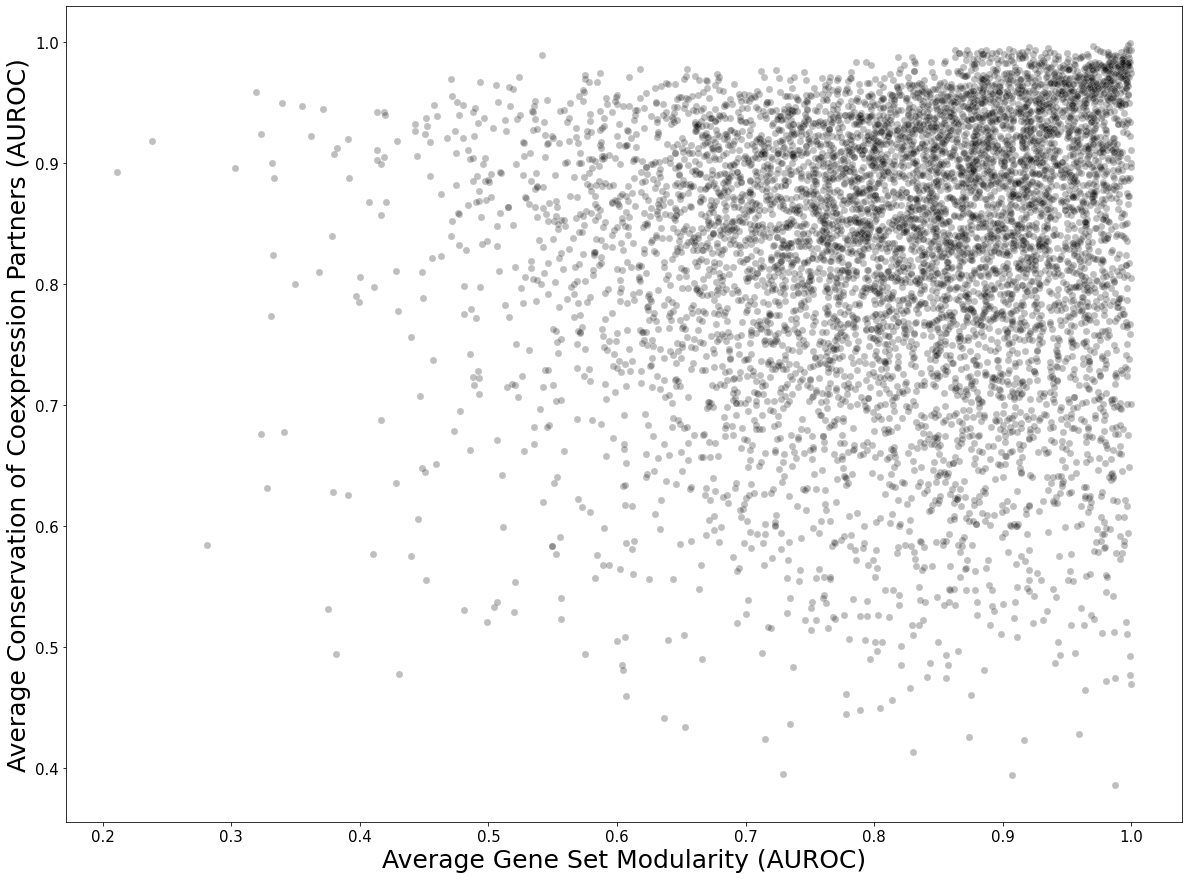

In [42]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25, )

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

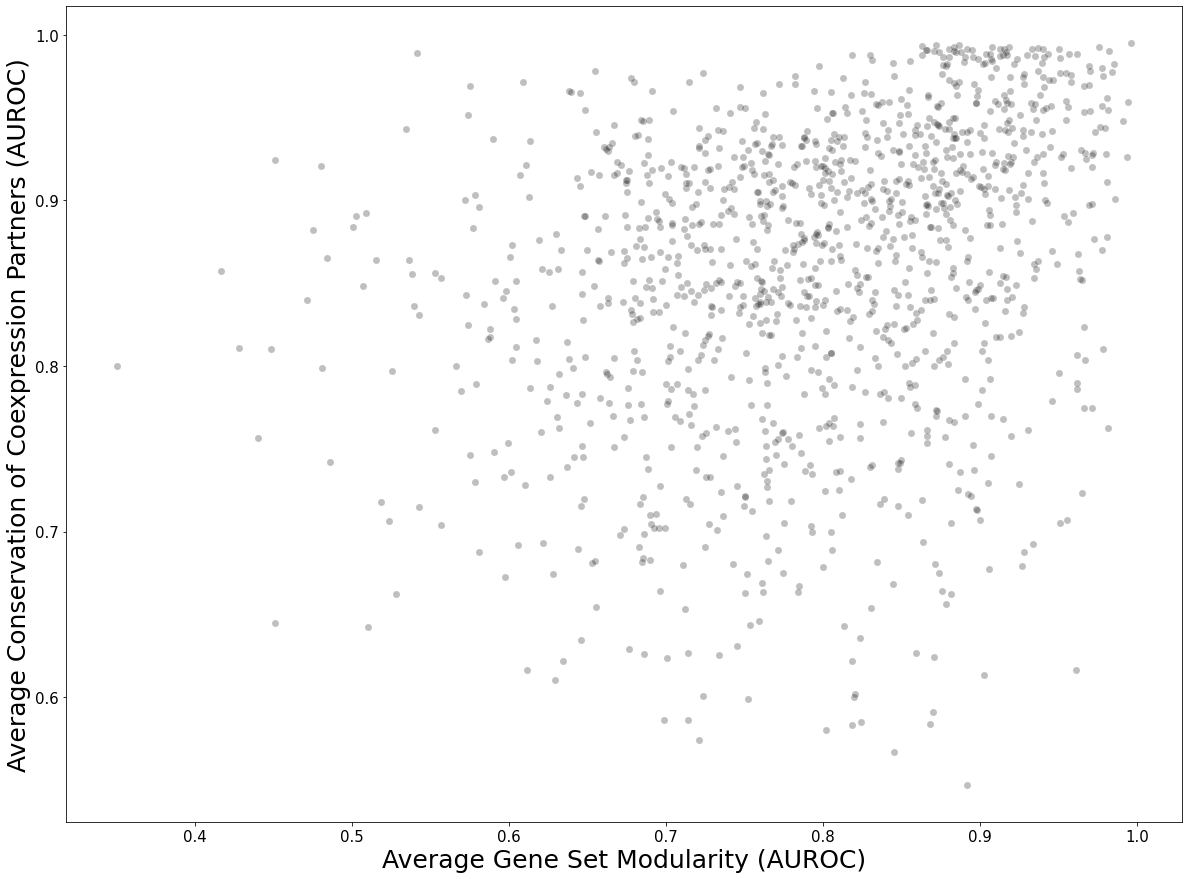

In [43]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [54]:
final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)]

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10772at3193,13,15,0.903499,0.808797
10950at3193,15,15,0.847786,0.842641
109843at3193,11,15,0.972793,0.927875
110087at3193,11,14,0.775750,0.810739
110263at3193,13,15,0.836938,0.631345
...,...,...,...,...
923at3193,14,15,0.841320,0.815407
9450at3193,11,15,0.825581,0.893543
9592at3193,14,15,0.817459,0.735142
9601at3193,14,15,0.884984,0.674710


In [63]:
limited_set = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Ortho_cross_all_tables/gene_based_over_10_species.csv',index_col= 0)

In [67]:
limited_set = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/gene_based_all_species.csv',index_col= 0)

In [68]:
final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)]

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,8,0.571467,0.829159
10051at3193,1,3,0.624235,0.824484
10092at3193,2,15,0.792259,0.910269
10147at3193,5,14,0.871767,0.709248
1018at3193,0,0,NaN,NaN
...,...,...,...,...
9842at3193,0,0,NaN,NaN
9877at3193,7,14,0.875542,0.852708
9919at3193,2,15,0.977898,0.913266
9942at3193,9,15,0.818473,0.543235


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

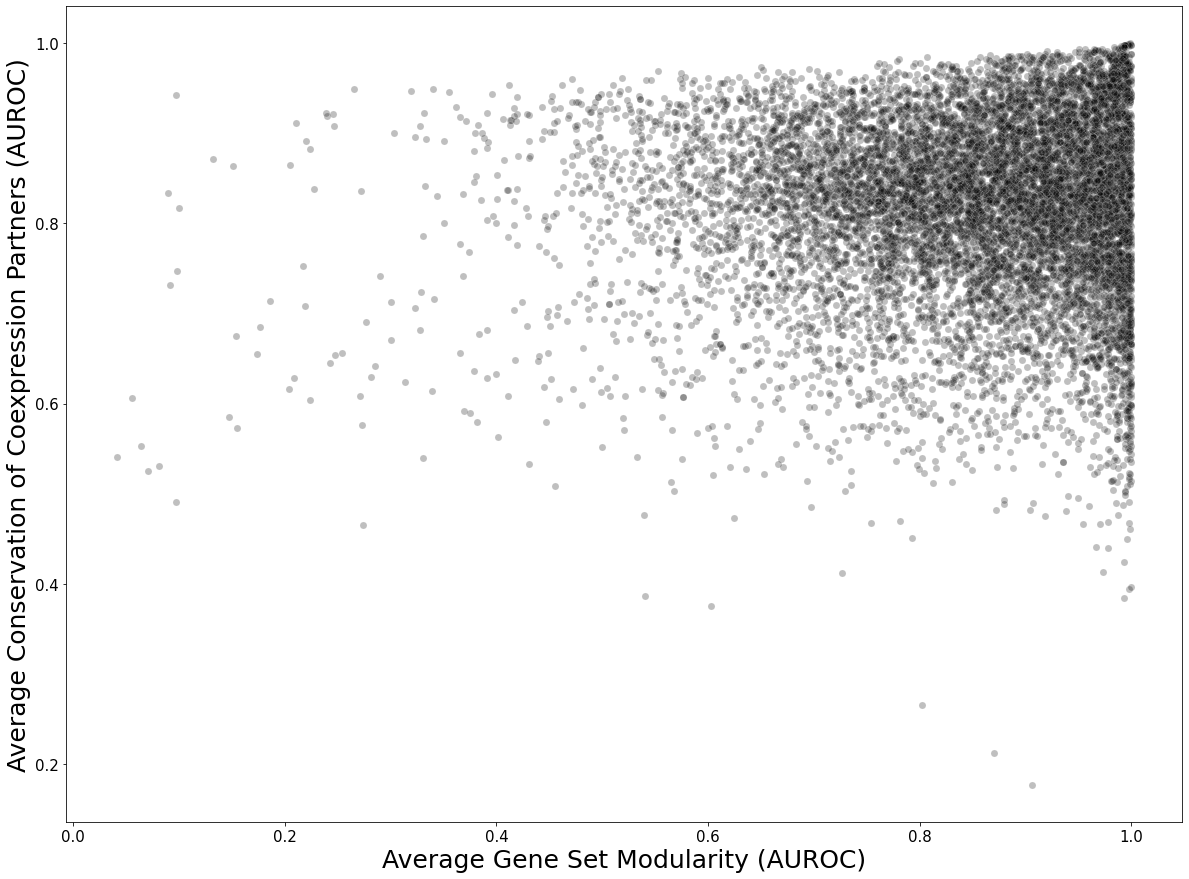

In [69]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [70]:
modded_plotting_frame = final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)].copy()

In [71]:
modded_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,8,0.571467,0.829159
10051at3193,1,3,0.624235,0.824484
10092at3193,2,15,0.792259,0.910269
10147at3193,5,14,0.871767,0.709248
1018at3193,0,0,NaN,NaN
...,...,...,...,...
9842at3193,0,0,NaN,NaN
9877at3193,7,14,0.875542,0.852708
9919at3193,2,15,0.977898,0.913266
9942at3193,9,15,0.818473,0.543235


In [72]:
modded_plotting_frame = modded_plotting_frame.rename(columns = {'AVG FC':'ORTHO FC',})

In [73]:
doubled_data = limited_set.merge(right = modded_plotting_frame[['ORTHO FC']], left_index=True, right_index= True)
doubled_data

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD,ORTHO FC
10009at3193,4,7,0.559915,0.829159,0.571467
10051at3193,1,1,0.566855,0.824484,0.624235
10092at3193,2,11,0.775712,0.910269,0.792259
10147at3193,5,11,0.852115,0.709248,0.871767
1018at3193,0,0,NaN,NaN,NaN
...,...,...,...,...,...
9842at3193,0,0,NaN,NaN,NaN
9877at3193,7,11,0.824784,0.852708,0.875542
9919at3193,2,11,0.960557,0.913266,0.977898
9942at3193,9,11,0.782169,0.543235,0.818473


In [74]:
doubled_data['Improvement from ORTHO'] = doubled_data['ORTHO FC'] - doubled_data['AVG FC']
doubled_data

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD,ORTHO FC,Improvement from ORTHO
10009at3193,4,7,0.559915,0.829159,0.571467,0.011552
10051at3193,1,1,0.566855,0.824484,0.624235,0.057379
10092at3193,2,11,0.775712,0.910269,0.792259,0.016547
10147at3193,5,11,0.852115,0.709248,0.871767,0.019652
1018at3193,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9842at3193,0,0,NaN,NaN,NaN,NaN
9877at3193,7,11,0.824784,0.852708,0.875542,0.050758
9919at3193,2,11,0.960557,0.913266,0.977898,0.017341
9942at3193,9,11,0.782169,0.543235,0.818473,0.036304


In [75]:
doubled_data.mean()

EGAD Species Present      3.473379
FC Species Present        7.660665
AVG FC                    0.783148
AVG EGAD                  0.842155
ORTHO FC                  0.810545
Improvement from ORTHO    0.028214
dtype: float64

In [62]:
doubled_data.mean()

EGAD Species Present      12.730132
FC Species Present        11.571192
AVG FC                     0.735789
AVG EGAD                   0.790506
ORTHO FC                   0.831178
Improvement from ORTHO     0.095388
dtype: float64

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

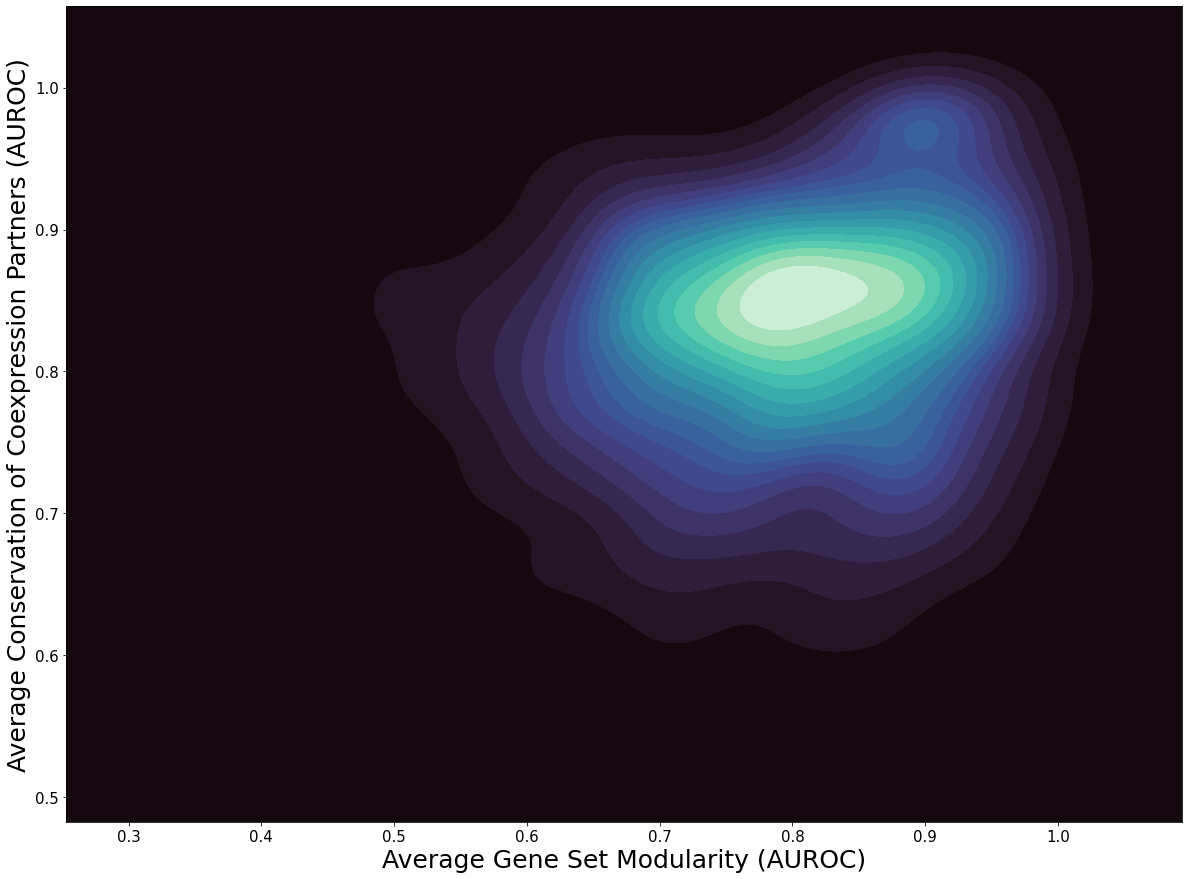

In [48]:
fig, ax = plt.subplots(figsize = (20,15))
sns.kdeplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>9) & (final_plotting_frame['FC Species Present']>9)],y = 'AVG FC',x = 'AVG EGAD',fill=True, thresh=0, levels=20, cmap="mako")

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [49]:
current_table

,cucumber and brome,Species 1 Score,Species 2 Score,Total Score
0,889388at3193,0.950222,0.919619,0.934920
1,36269at3193,0.735552,0.744453,0.740002
2,33678at3193,0.609290,0.805392,0.707341
3,58131at3193,0.807129,0.770927,0.789028
4,874774at3193,0.855705,0.649390,0.752547
...,...,...,...,...
8234,129830at3193,0.966665,0.974388,0.970526
8235,889843at3193,0.984990,0.988427,0.986708
8236,621268at3193,0.758965,0.744939,0.751952
8237,885679at3193,0.628842,0.560095,0.594468


In [ ]:
current_combination

In [ ]:
current_combination[0]

In [ ]:
cur

In [ ]:
current_table.loc[current_table['sorghum'].isin(current_og_groups['Symbol'].to_list())]

In [ ]:
current_og_groups

In [ ]:
current_og_groups.merge(how = 'left', left_on = "Symbol",right_on=current_combination[0], right = current_table[[current_combination[0],current_combination[1],'Total Score']] )

In [ ]:
merged_groups.head(50)

In [ ]:
current_species_taxa

In [ ]:
species_with_nets

In [ ]:
current_table

In [ ]:
all_fc_scores.sum().head(50)

In [ ]:
mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
mean_fc


In [ ]:
    species_specific_df = pd.DataFrame(index = egad_scores.index)


In [ ]:
species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')


In [ ]:
species_specific_df

In [ ]:
all_group_annotations = pd.DataFrame(columns = ['Avg FC','Avg EGAD', 'Species Present'], index = og_groups['Orthogroup'].unique())

In [ ]:
all_group_annotations

In [ ]:
# for group in tqdm.tqdm(all_group_annotations.index):
#     genes = og_groups.loc[og_groups['Orthogroup'] == group]
#     num_species = len(genes['Species'].unique())
#     all_group_annotations.loc[group,'Species Present'] = num_species
all_group_annotations= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
all_group_annotations

In [ ]:
all_group_annotations.to_csv('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_number_species.csv')

In [ ]:
file_genes = open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','wb')
pickle.dump(all_group_annotations,file_genes)
file_genes.close()

In [ ]:
all_orthogroups= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
over_3_groups_annotated = all_group_annotations.loc[all_group_annotations['Species Present']>3]
over_3_groups_annotated

In [ ]:
list_of_species = species_with_nets_to_run['Species'].to_list()
list_of_species

In [ ]:
egad_dataframe = pd.DataFrame(columns = list_of_species, index = over_3_groups_annotated.index,)
egad_dataframe

In [ ]:
for species in tqdm.tqdm(list_of_species):
    current_coconet = CococoNet_reader.read_cococonet(species)
    


In [ ]:
over_3_groups_annotated.

In [ ]:
all_group_annotations

In [ ]:
all_group_annotations

In [ ]:
num_species = len(genes['Species'].unique())
num_species

In [ ]:
genes